In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, InputLayer, Dropout, Flatten, BatchNormalization, Conv1D
from tensorflow.keras.layers import concatenate
from keras.utils import to_categorical
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import LSTM, MaxPool1D, GlobalAveragePooling1D, Activation

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import glob

#전처리 과정

file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject1.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject2.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject3.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject4.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject5.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject6.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject7.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject8.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject9.log',
    '/content/drive/MyDrive/Colab Notebooks/mHealth_subject10.log',
]

# 컬럼 명

column_names = [
    'acc_chest_x', 'acc_chest_y', 'acc_chest_z',
    'ecg_lead_1', 'ecg_lead_2',
    'acc_ankle_x', 'acc_ankle_y', 'acc_ankle_z',
    'gyro_ankle_x', 'gyro_ankle_y', 'gyro_ankle_z',
    'mag_ankle_x', 'mag_ankle_y', 'mag_ankle_z',
    'acc_arm_x', 'acc_arm_y', 'acc_arm_z',
    'gyro_arm_x', 'gyro_arm_y', 'gyro_arm_z',
    'mag_arm_x', 'mag_arm_y', 'mag_arm_z',
    'label'
]

df_list = []
for i, file_path in enumerate(file_paths, 1):
    try:
        # 공백 기준으로 csv 읽기
        df = pd.read_csv(file_path, sep='\s+', header=None)

        # subject 열 추가
        df['subject'] = i

        df_list.append(df)

    except Exception as e:
        print(f"{file_path} 에서 오류 발생: {e}")

# 모든 데이터프레임을 하나로 통합
if df_list:
    # 데이터프레임 리스트를 상하로 연결
    mhealth_df = pd.concat(df_list, ignore_index=True)

    # 컬럼에 subject 추가
    mhealth_df.columns = column_names + ['subject']

else:
    print("\n처리할 데이터프레임이 없습니다.")

<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3447199837.py:37: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+', header=None)


In [6]:
# label 0은 제외

mhealth_df = mhealth_df[mhealth_df['label'] != 0].copy()

In [7]:
# 1~12 label 값을 0~11 값으로 변경. (sparse_categorical_crossentropy 를 위함)
mhealth_df['label'] = mhealth_df['label'] - 1

In [8]:
mhealth_df.head()

,acc_chest_x,acc_chest_y,acc_chest_z,ecg_lead_1,ecg_lead_2,acc_ankle_x,acc_ankle_y,acc_ankle_z,gyro_ankle_x,gyro_ankle_y,...,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label,subject
6656,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,-0.88931,...,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,0,1
6657,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,-0.88931,...,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,0,1
6658,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,-0.86867,...,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,0,1
6659,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,-0.86867,...,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,0,1
6660,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,-0.86867,...,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,0,1


In [9]:
mhealth_df.tail()

,acc_chest_x,acc_chest_y,acc_chest_z,ecg_lead_1,ecg_lead_2,acc_ankle_x,acc_ankle_y,acc_ankle_z,gyro_ankle_x,gyro_ankle_y,...,acc_arm_y,acc_arm_z,gyro_arm_x,gyro_arm_y,gyro_arm_z,mag_arm_x,mag_arm_y,mag_arm_z,label,subject
1213641,-21.947,3.9236,-6.2258,0.133960,0.163270,-2.4873,-19.233,3.4614,0.61967,-0.33771,...,-4.9652,2.48090,-0.43725,-1.0185,0.079741,-0.2130,14.6060,8.5139,11,10
1213642,-21.914,2.7521,-12.2790,-0.087912,-0.083726,-21.5910,-19.437,-6.0419,0.61967,-0.33771,...,-10.2130,3.65600,-0.43725,-1.0185,0.079741,8.6185,36.0000,-21.1260,11,10
1213643,-21.814,-2.7274,-12.7090,-0.309790,-0.200940,7.5433,-19.245,-2.6680,0.61967,-0.33771,...,-18.7050,4.46060,-0.43725,-1.0185,0.079741,16.9530,7.6535,-34.3950,11,10
1213644,-21.790,-3.9229,-7.2794,-0.443750,-0.259550,3.0142,-19.334,-7.7074,0.71058,-0.27017,...,-18.6980,1.15880,-0.42549,-1.0370,0.084052,25.3750,-29.7960,4.0546,11,10
1213645,-14.451,-1.6723,-4.7926,1.908900,1.385700,-2.3698,-19.300,-4.2387,0.71058,-0.27017,...,-14.2910,-0.13123,-0.42549,-1.0370,0.084052,12.0000,33.0610,33.1220,11,10


In [10]:
# 결측치 확인

mhealth_df.isnull().sum()

,0
acc_chest_x,0
acc_chest_y,0
acc_chest_z,0
ecg_lead_1,0
ecg_lead_2,0
acc_ankle_x,0
acc_ankle_y,0
acc_ankle_z,0
gyro_ankle_x,0
gyro_ankle_y,0


In [11]:
# 라벨 값 확인

mhealth_df['label'].value_counts()

,count
label,
0,30720
1,30720
2,30720
3,30720
8,30720
4,30720
10,30720
9,30720
6,29441


In [12]:
N_TIMESTEPS = 100      # 시퀀스 길이
N_FEATURES = 23        # 센서 특징 수
N_CLASSES = 13         # 라벨의 개수

In [13]:
# subject를 기준으로 트레인/테스트 나누기

train_df = mhealth_df[~mhealth_df['subject'].isin([1,2])]  # 1,2 가 subject번호
test_df = mhealth_df[mhealth_df['subject'].isin([1,2])]

In [14]:
# 분할된 데이터들로 훈련용 frames, labels과 테스트용 frames, labels 생성

X_train = train_df.drop(['subject', 'label'], axis=1)
y_train = train_df['label']

X_test = test_df.drop(['subject', 'label'], axis=1)
y_test = test_df['label']

In [15]:
# 데이터 형태 확인

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (272489, 23)
X_test.shape: (70706, 23)
y_train.shape: (272489,)
y_test.shape: (70706,)


In [16]:
# 정규화

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 정규화 후 시계열 데이터 생성을 위한 데이터프레임으로 변환

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
# 시계열 데이터 생성

def create_sequences(X, y, time_steps=N_TIMESTEPS):
    # 최종적으로 만들어질 배열의 크기 계산
    n_samples = len(X) - time_steps
    n_features = X.shape[1]

    # 빈 배열을 미리 할당
    X_seq = np.empty((n_samples, time_steps, n_features), dtype=np.float32)
    y_seq = np.empty(n_samples, dtype=np.int32)

    # 루프를 돌며 미리 할당된 공간에 데이터 넣기
    for i in range(n_samples):
        X_seq[i] = X.iloc[i : i + time_steps].values
        y_seq[i] = y.iloc[i + time_steps]

    return X_seq, y_seq

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test)

In [19]:
# CNN-LSTM 모델
model_CNN_LSTM = Sequential()

# CNN 부분
model_CNN_LSTM.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same',
                          input_shape=(N_TIMESTEPS, 23)))
model_CNN_LSTM.add(BatchNormalization())
model_CNN_LSTM.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'))
model_CNN_LSTM.add(BatchNormalization())
model_CNN_LSTM.add(MaxPooling1D(pool_size=2))

# LSTM 부분
model_CNN_LSTM.add(LSTM(128, return_sequences=False, activation='tanh'))
model_CNN_LSTM.add(Dropout(0.4))

# 출력층
model_CNN_LSTM.add(Dense(128, activation='relu'))
model_CNN_LSTM.add(Dense(12, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model_CNN_LSTM.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model_CNN_LSTM.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 100, 128)       │         8,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,908 (816.05 KB)

 Trainable params: 208,396 (814.05 KB)

 Non-trainable params: 512 (2.00 KB)

In [22]:
from keras.callbacks import EarlyStopping

# 모델 학습

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_CNN_LSTM.fit(X_train_seq, y_train_seq, epochs=20, batch_size=128, validation_split=0.2, verbose = 1, callbacks=[early_stopping])

Epoch 1/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9984 - loss: 0.0090 - val_accuracy: 0.9707 - val_loss: 0.0980
Epoch 2/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9988 - loss: 0.0069 - val_accuracy: 0.9323 - val_loss: 0.5463
Epoch 3/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 0.9388 - val_loss: 0.4103
Epoch 4/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9216 - val_loss: 0.6481
Epoch 5/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9341 - val_loss: 0.6734
Epoch 6/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9990 - loss: 0.0059 - val_accuracy: 0.9361 - val_loss: 0.6612
Epoch 7/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9994 - loss: 0.0043 - val_accuracy: 0.9188 - val_loss: 0.9251
Epoch 8/20
1703/1703 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9994 -

In [23]:
# 모델 평가

loss, accuracy = model_CNN_LSTM.evaluate(X_test_seq, y_test_seq, verbose=1)
print(f"\n테스트 데이터셋 최종 정확도: {accuracy * 100:.2f}%")

2207/2207 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8131 - loss: 1.1581

테스트 데이터셋 최종 정확도: 84.26%


In [24]:
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Standing still',
        1: 'Sitting and relaxing',
        2: 'Lying down',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

2207/2207 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


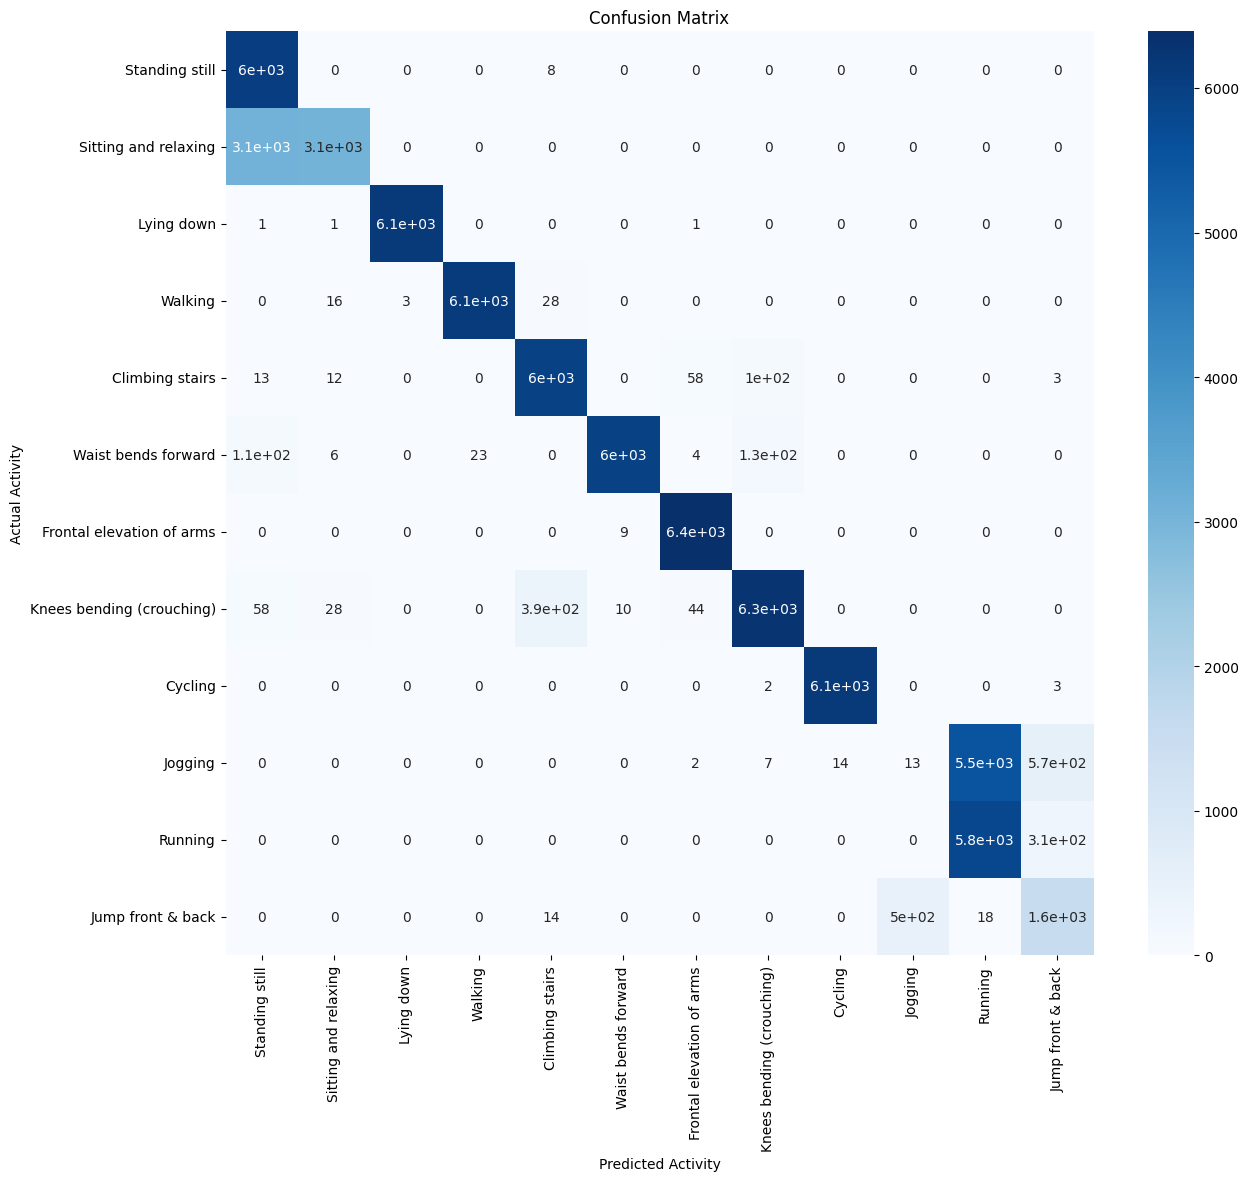

Accuracy Score: 84.2620%
Precision Score: 80.6086%
Recall Score: 83.6247%
F_1 Score: 80.4847%


In [25]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

y_pred_probs = model_CNN_LSTM.predict(X_test_seq)
y_pred = np.argmax(y_pred_probs, axis=1)

results_summarizer(y_test_seq, y_pred)

In [26]:
print("--- Classification Report ---")



activity_map = {
        0: 'Standing still',
        1: 'Sitting and relaxing',
        2: 'Lying down',
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
# activity_map의 레이블 이름을 가져와 리포트에 표시
activity_labels = list(activity_map.values())

print(classification_report(y_test_seq, y_pred, target_names=activity_labels))

# 3. Confusion Matrix 출력
print('\n' + '*' * 50)
print("--- Confusion Matrix ---")
print(confusion_matrix(y_test_seq, y_pred))

--- Classification Report ---
                           precision    recall  f1-score   support

           Standing still       0.65      1.00      0.79      6044
     Sitting and relaxing       0.98      0.50      0.66      6144
               Lying down       1.00      1.00      1.00      6144
                  Walking       1.00      0.99      0.99      6144
          Climbing stairs       0.93      0.97      0.95      6144
      Waist bends forward       1.00      0.96      0.98      6246
Frontal elevation of arms       0.98      1.00      0.99      6400
Knees bending (crouching)       0.96      0.92      0.94      6809
                  Cycling       1.00      1.00      1.00      6144
                  Jogging       0.03      0.00      0.00      6144
                  Running       0.51      0.95      0.67      6144
        Jump front & back       0.64      0.75      0.69      2099

                 accuracy                           0.84     70606
                macro avg     